In [4]:
import tensorflow as tf
import os

In [6]:
!pip install kaggle

In [34]:
   import zipfile
   import os

   with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
       zip_ref.extractall('AL')  # Extracts to the 'ML' directory
   

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
tf.config.list_physical_devices('GPU')

[]

In [10]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your dataset
dataset_path = 'AL/Fruits_Vegetables_Dataset(12000)/Fruits'

# Define the image size and batch size
img_width, img_height = 250, 250
batch_size = 32

# Create an ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to the range [0, 1]
    # shear_range=0.2,  # Uncomment for augmentation
    # zoom_range=0.2,
    # rotation_range=10, # Uncomment for augmentation
    # horizontal_flip=True,  # Uncomment for augmentation
    validation_split=0.2,  # Split the data into training (80%) and validation (20%)
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Create training and validation data generators
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',  # Use categorical cross-entropy for 10 classes
    subset='training'  # Specify this is the training set (80%)
)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

validation_generator = validation_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)



Found 2991 images belonging to 2 classes.
Found 747 images belonging to 2 classes.


In [15]:
import matplotlib.pyplot as plt

def display_image_with_class_name(image, label):
    # 
  """Displays an image with its class name."""
#
  plt.imshow(image)
  plt.title(class_labels[label])  # Use label to get class name
  plt.axis('off')
  plt.show()

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

# Create the sequential model with reduced complexity and regularization
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(250, 250, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), strides=1, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    MaxPooling2D(),
    Dropout(0.3),

    BatchNormalization(),
    Conv2D(128, (3, 3), strides=1, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    MaxPooling2D(),
    Dropout(0.4),

    BatchNormalization(),
    Conv2D(64, (3, 3), strides=1, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    MaxPooling2D(),

    # BatchNormalization(),
    # Conv2D(32, (3, 3), strides=1, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    # MaxPooling2D(),

    Flatten(),
    Dense(512, activation='relu'),  # Reduced size of the Dense layer
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Check the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_6           │ (None, 250, 250, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 248, 248, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 124, 124, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 124, 124, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 124, 124, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 122, 122, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 61, 61, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 61, 61, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 61, 61, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 59, 59, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    27,558,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,709,133 (105.70 MB)

 Trainable params: 27,708,743 (105.70 MB)

 Non-trainable params: 390 (1.52 KB)

In [ ]:
logdir = 'logs'
# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0002)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Train with augmented data
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping, lr_schedule, tensorboard_callback]
)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5439 - loss: 27.1162

D:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.5443 - loss: 26.9433 - val_accuracy: 0.5863 - val_loss: 1.0069 - learning_rate: 0.0010
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.7271 - loss: 0.8671 - val_accuracy: 0.7336 - val_loss: 0.9375 - learning_rate: 0.0010
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.7373 - loss: 0.8675 - val_accuracy: 0.6359 - val_loss: 0.9403 - learning_rate: 0.0010
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.7776 - loss: 0.7817 - val_accuracy: 0.5930 - val_loss: 0.9404 - learning_rate: 0.0010
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 237s 3s/step - accuracy: 0.7861 - loss: 0.7586 - val_accuracy: 0.6185 - val_loss: 0.8856 - learning_rate: 0.0010
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.8078 - loss: 0.6975 - val_accuracy: 0.6479 - val_loss: 0.8991 - learning_rate: 0.0010
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - accuracy: 0.8371 - loss: 0.6474 - val_accuracy: 0.6

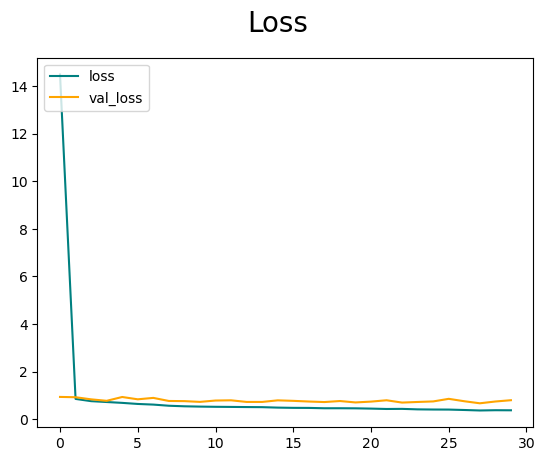

In [61]:
# Load data
import numpy as np
from matplotlib import pyplot as plt
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

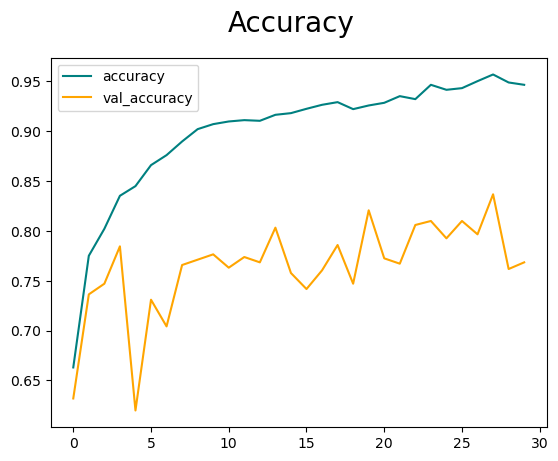

In [63]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

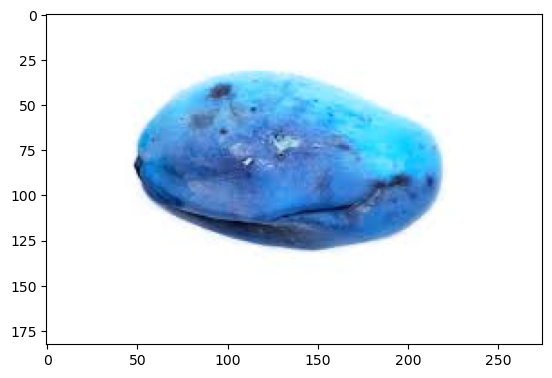

In [65]:
import cv2
img = cv2.imread('download.jpeg')
plt.imshow(img)
plt.show()

In [85]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the trained model (assuming it's already been trained)
# If it's not loaded in your environment, you can load it from a saved model file:
# model = tf.keras.models.load_model('path_to_your_saved_model')

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size=(250, 250)):
    # Load the image
    img = image.load_img(img_path, target_size=target_size)
    
    # Convert the image to an array
    img_array = image.img_to_array(img)
    
    # Expand dimensions to match the input shape required by the model (batch_size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Normalize pixel values to [0, 1] as done during training (rescaling)
    img_array = img_array / 255.0
    
    return img_array

# Path to the test image
image_path = 'download4.jpeg'

# Preprocess the image
preprocessed_image = load_and_preprocess_image(image_path)

# Predict the class using the model
prediction = model.predict(preprocessed_image)

# Since the output is a single sigmoid neuron (for binary classification)
if prediction[0] > 0.5:
    print(f"The image is predicted to be Rotten (Probability: {prediction[0]})")
else:
    print(f"The image is predicted to be Fresh (Probability: {prediction[0]})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
The image is predicted to be Rotten (Probability: [0.841783])


In [62]:
 pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
from tensorflow.keras.models import load_model

# Save the model
os.makedirs('models', exist_ok=True)
model.save(os.path.join('models', 'freshness-rottenclassifier.keras'))  # Saves in the TensorFlow SavedModel format

# Load the model
new_model = load_model(os.path.join('models', 'freshness-rottenclassifier.keras'))

# Assuming 'resize' is your preprocessed image, normalize it as neededpip install --upgrade tensorflow

preprocessed_image = np.expand_dims(resize / 255.0, axis=0)  # Make sure 'resize' is an image array

# Use the loaded model for prediction
prediction = new_model.predict(preprocessed_image)

# Output the result
print("Prediction:", prediction)


NameError: name 'model' is not defined

In [93]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.
